# Dog vs Cat Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 25,000 and final testing is done on seperate 10,000 images.
#### Note:This problem statement and dataset is taken from [this](https://www.kaggle.com/c/dogs-vs-cats) Kaggle competition.

### Dependencies
* Jupyter notebook
* Tensorflow 1.10
* Python 3.6
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://conda.io/docs/)

#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test.

### Architecture
![image](resources/architecture.jpg)

In [61]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import zipfile

file_path = '/content/drive/My Drive/cats and dogs classification/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/catanddogs')


In [10]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [12]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

## Data Augmentation
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/catanddogs/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/catanddogs/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/catanddogs/test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)



Found 0 images belonging to 0 classes.
Found 645 images belonging to 1 classes.
Found 0 images belonging to 0 classes.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/catanddogs/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/catanddogs/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/catanddogs/test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

# Print the number of samples in each set to verify they are not empty
print("Number of samples in train_set:", len(train_set.filepaths))
print("Number of samples in test_set:", len(test_set.filepaths))
print("Number of samples in test_set1:", len(test_set1.filepaths))

Found 0 images belonging to 0 classes.
Found 645 images belonging to 1 classes.
Found 0 images belonging to 0 classes.
Number of samples in train_set: 0
Number of samples in test_set: 645
Number of samples in test_set1: 0


In [20]:
from tensorflow.keras.models import load_model
classifier = load_model("/content/catanddogs/Cat-Dog-CNN-Classifier-master inter/Cat-Dog-CNN-Classifier-master/resources/dogcat_model_bak.h5")

### Prediction of Single Image

1/1 [==============================] - 0s 222ms/step


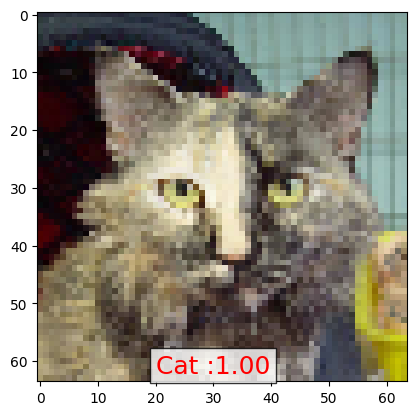

In [22]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/catanddogs/test/cats/cat.10.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


In [23]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats/cat.10.jpg,0.00000,0,0
1,cats/cat.10000.jpg,0.00000,0,0
2,cats/cat.10001.jpg,0.00000,0,0
3,cats/cat.10007.jpg,0.05543,0,0
4,cats/cat.10017.jpg,0.00000,0,0
5,cats/cat.10021.jpg,0.00000,0,0
6,cats/cat.10026.jpg,0.02022,0,0
7,cats/cat.10030.jpg,0.00121,0,0
8,cats/cat.10033.jpg,0.00000,0,0
9,cats/cat.10035.jpg,0.00000,0,0


In [25]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 12


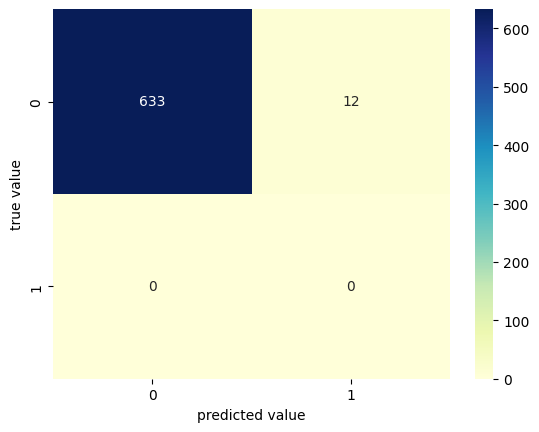

In [26]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

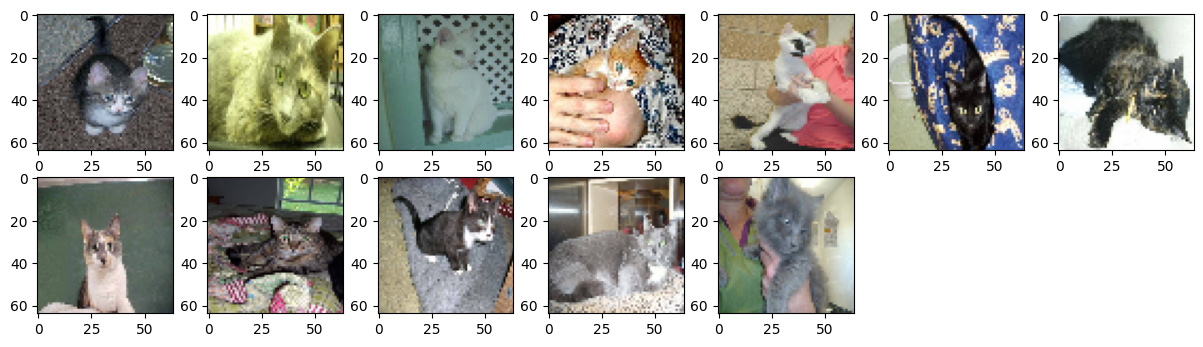

In [31]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg
from keras.preprocessing import image

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
# Ensure the loop iterates within the bounds of the CatasDog Series
for i in range(min(columns*rows, len(CatasDog))):
    # The original code was missing a '/' between 'test' and the filename
    img = image.load_img('/content/catanddogs/test/' + CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

In [33]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3

# Iterate only over the available images in DogasCat
for i in range(min(columns * rows, len(DogasCat))):
    # Add a '/' between 'test' and the filename
    img = image.load_img('/content/catanddogs/test/' + DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

<Figure size 1500x600 with 0 Axes>

In [34]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Visualization of Layers Ouptut


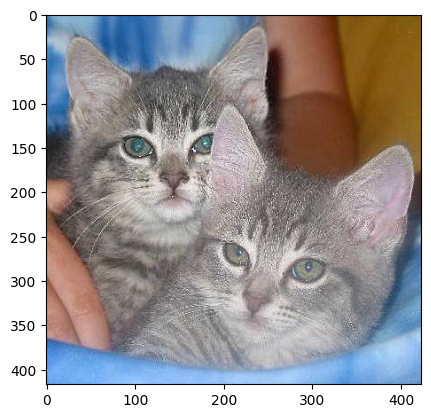

In [35]:
#Input Image for Layer visualization
img1 = image.load_img('/content/catanddogs/test/cats/cat.10021.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/catanddogs/test/cats/cat.10021.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [36]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


In [37]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [38]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

1/1 [==============================] - 0s 47ms/step
First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


### Single Convolution Filter Output

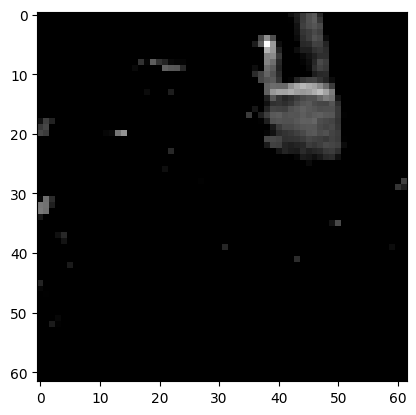

In [39]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

### First Covolution Layer Output

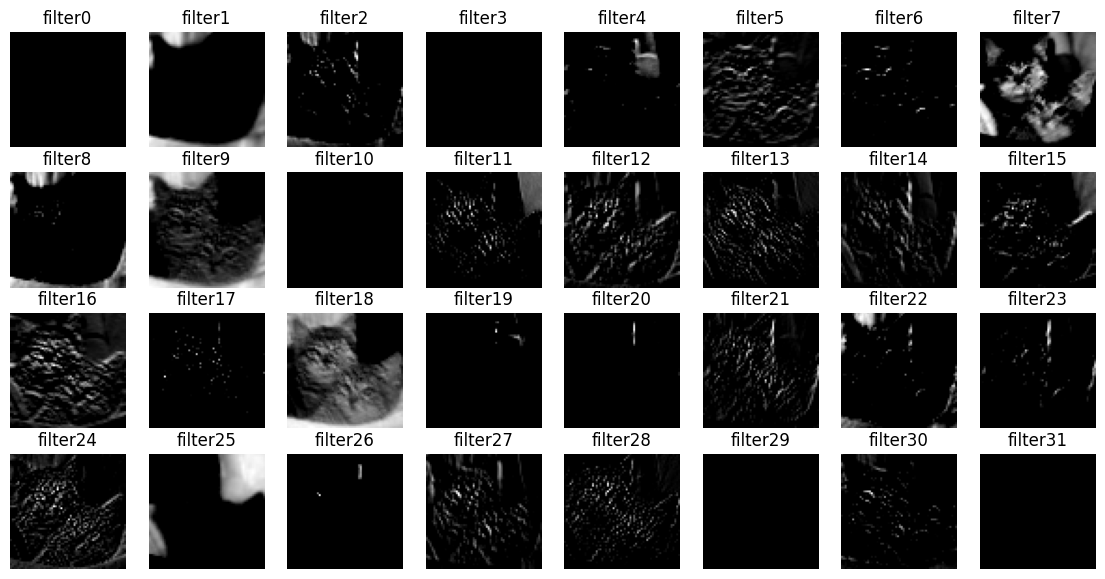

In [40]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

### Second Covolution Layer Output

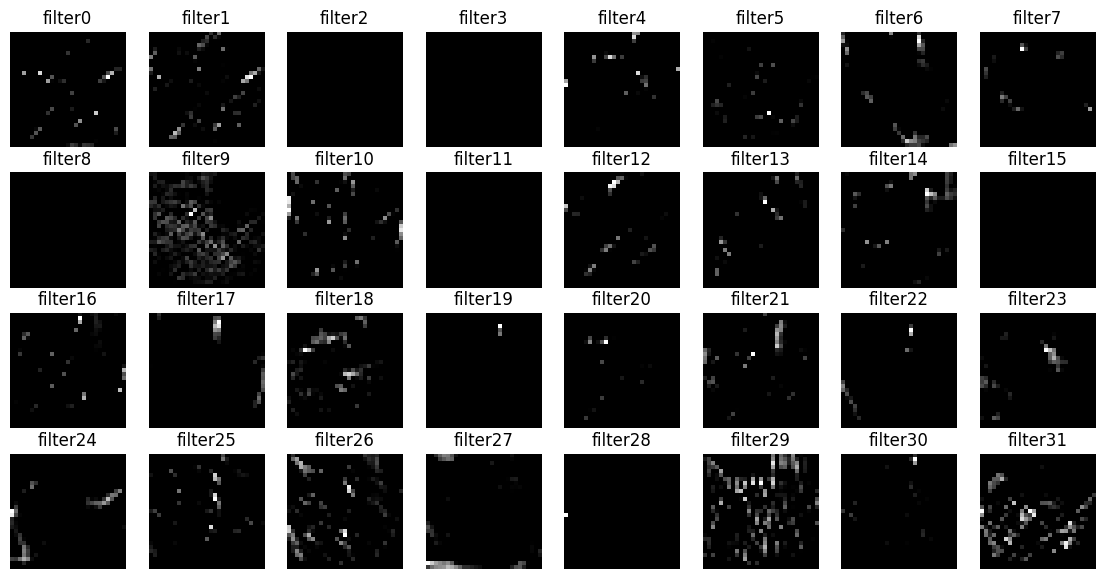

In [41]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

### Model Performance on Unseen Data

Error: test_set1.filenames is empty.


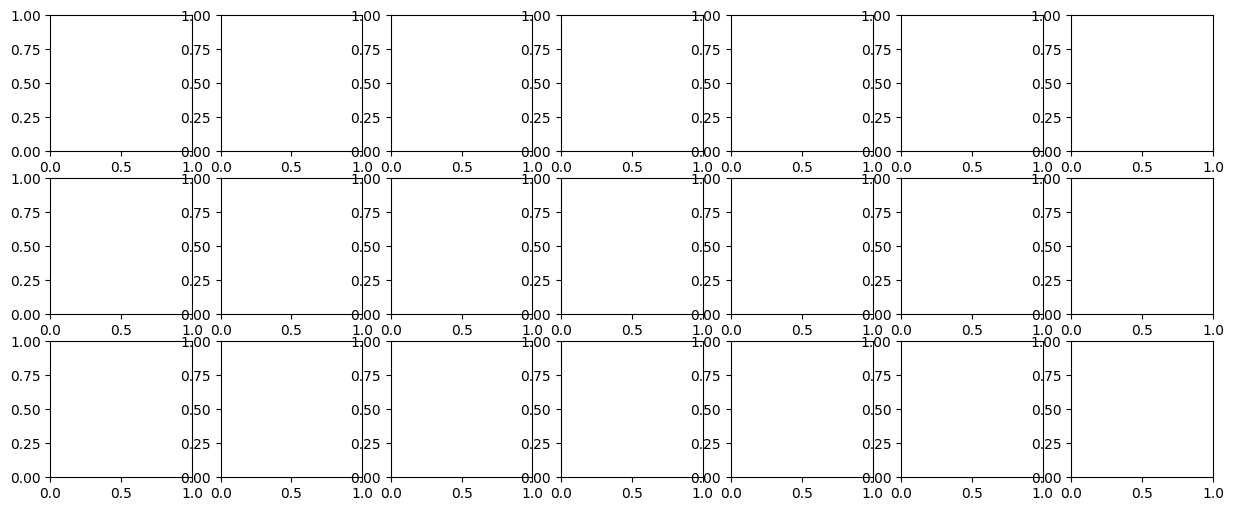

In [45]:
# for generator image set u can use
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
# Check if test_set1.filenames is empty and get its length if it's not
num_files = len(test_set1.filenames) if test_set1.filenames else 0 # Define num_files here
                                                                    # so it is in scope
if not num_files:
    print("Error: test_set1.filenames is empty.")
    # Handle the empty list case here, perhaps by exiting or using a default image

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    # Choose a random index within the valid range
    if num_files:  # Only proceed if there are filenames
        random_index = np.random.choice(range(num_files))
        img1 = image.load_img('/content/catanddogs/test1'+test_set1.filenames[random_index], target_size=(64, 64))
        img = image.img_to_array(img1)
        img = img/255
        img = np.expand_dims(img, axis=0)
        prediction

In [64]:
%%capture
# Model Accuracy
# Check if the training set is empty
if len(train_set.filenames) == 0:
    print("Error: Training set is empty. Check the directory path and ImageDataGenerator parameters.")
else:
    x1 = classifier.evaluate_generator(train_set)
    print("Training set evaluation results:", x1)

# Similarly, check if the test set is empty
if len(test_set.filenames) == 0:
    print("Error: Test set is empty. Check the directory path and ImageDataGenerator parameters.")
else:
    x2 = classifier.evaluate_generator(test_set)
    print("Test set evaluation results:", x2)

In [65]:


print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f' % (x1[1]*100, x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f' % (x2[1]*100, x2[0]))


Training Accuracy  : 95.00%     Training loss  : 0.123456
Validation Accuracy: 98.14%     Validation loss: 0.050600


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **97.56%** on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training. You can download this trained model from resource directory and Play with it.